In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False):
    columns = [c for c in df.columns if c_filter in c]
    gd = df.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd[columns].plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [424]:
!scp -r osnielteixeira2@200.20.15.153:~/experiments/. ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

epoch=82-step=663999.ckpt                     100%   90KB   1.1MB/s   00:00    
hparams.yaml                                  100%   92     2.9KB/s   00:00    
metrics.csv                                   100%  735KB   6.3MB/s   00:00    
epoch=349-step=2799999.ckpt                   100%   90KB   1.8MB/s   00:00    
hparams.yaml                                  100%   92     2.8KB/s   00:00    
metrics.csv                                   100% 3276KB  19.0MB/s   00:00    
epoch=32-step=263999.ckpt                     100%   92KB   1.8MB/s   00:00    
hparams.yaml                                  100%   92     2.8KB/s   00:00    
metrics.csv                                   100%  295KB   3.6MB/s   00:00    
epoch=344-step=2759999.ckpt                   100%   90KB   1.8MB/s   00:00    
hparams.yaml                                  100%   92     2.8KB/s   00:00    
metrics.csv                                   100% 2983KB  19.0MB/s   00:00    
epoch=33-step=271999.ckpt               

In [425]:
metrics_path = './experiments/2024-09-13 0909/0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [426]:
# display(metrics, 'mvc', 'MVC Score')

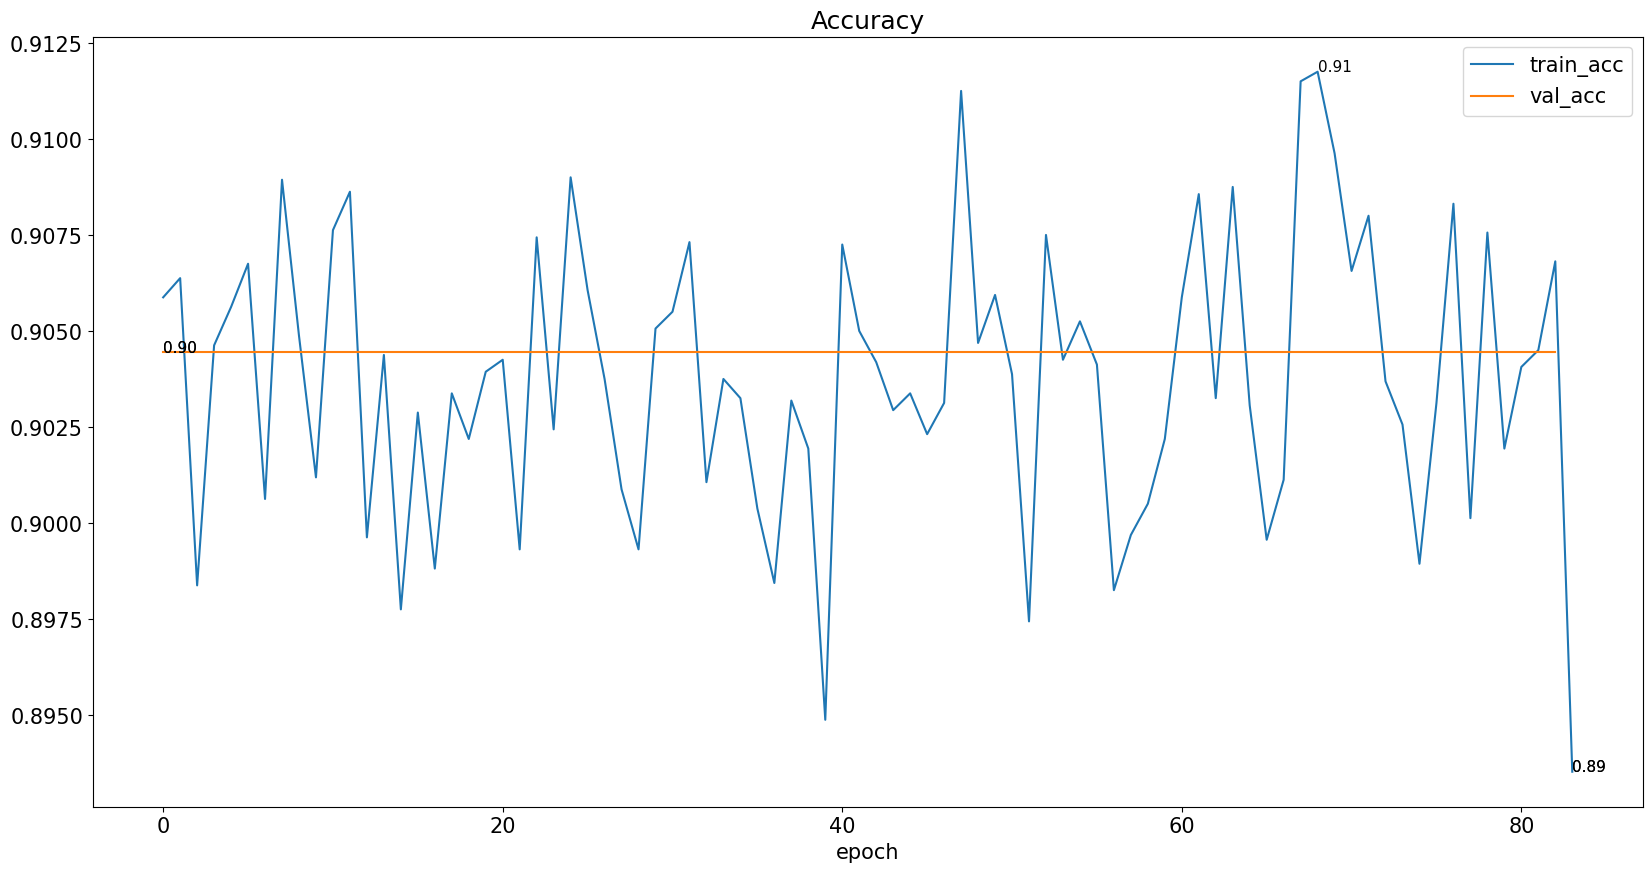

In [427]:
display(metrics, 'acc', 'Accuracy')

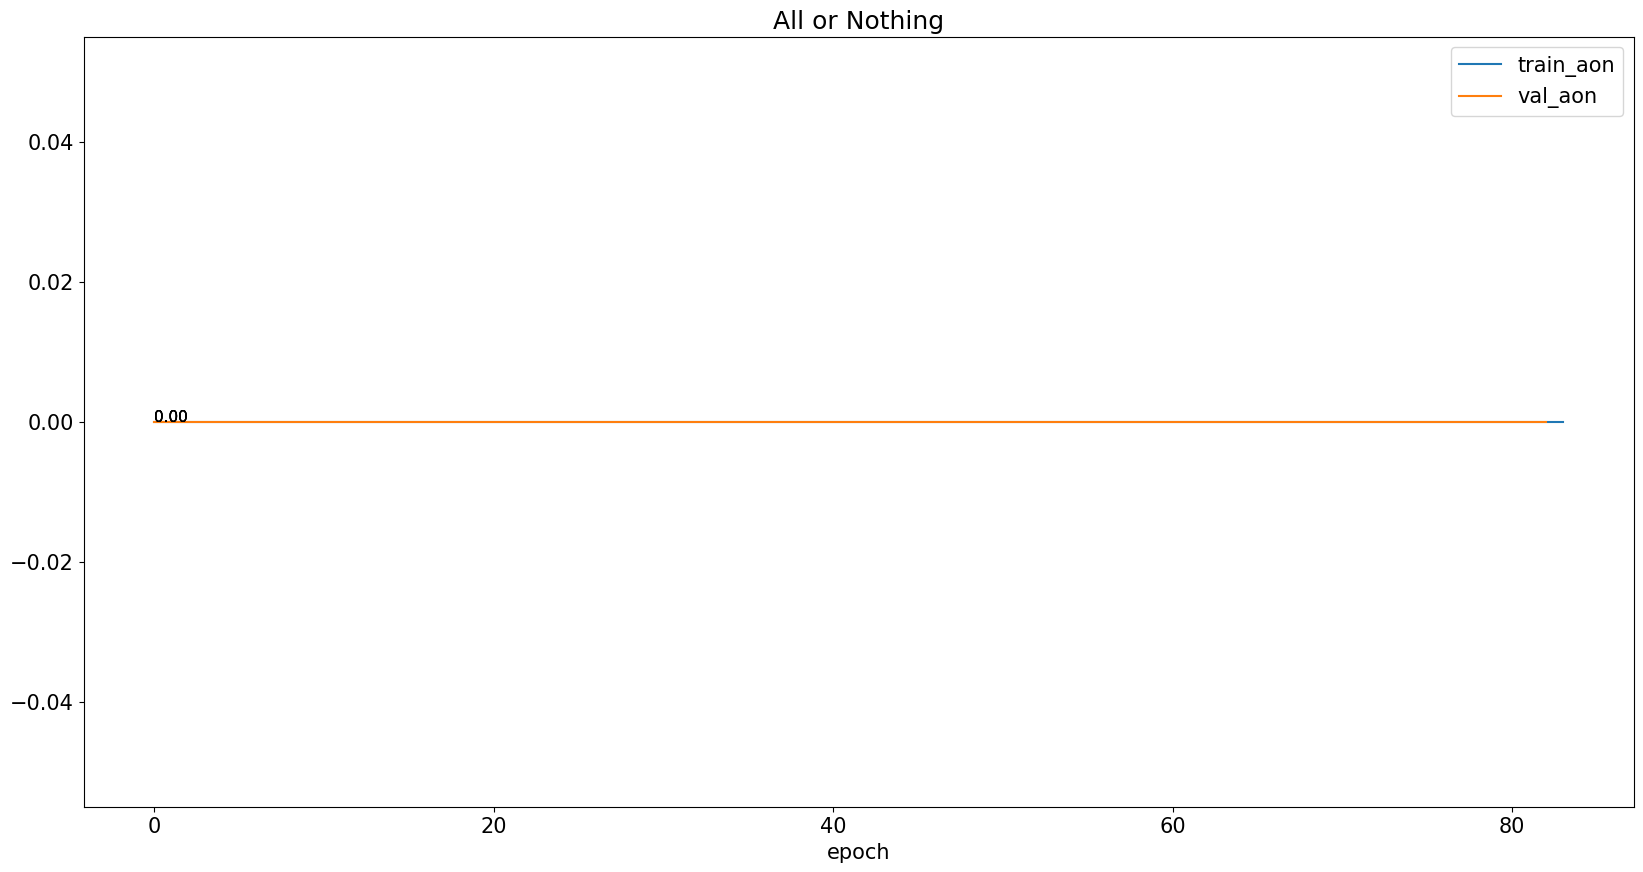

In [428]:
display(metrics, 'aon', 'All or Nothing')

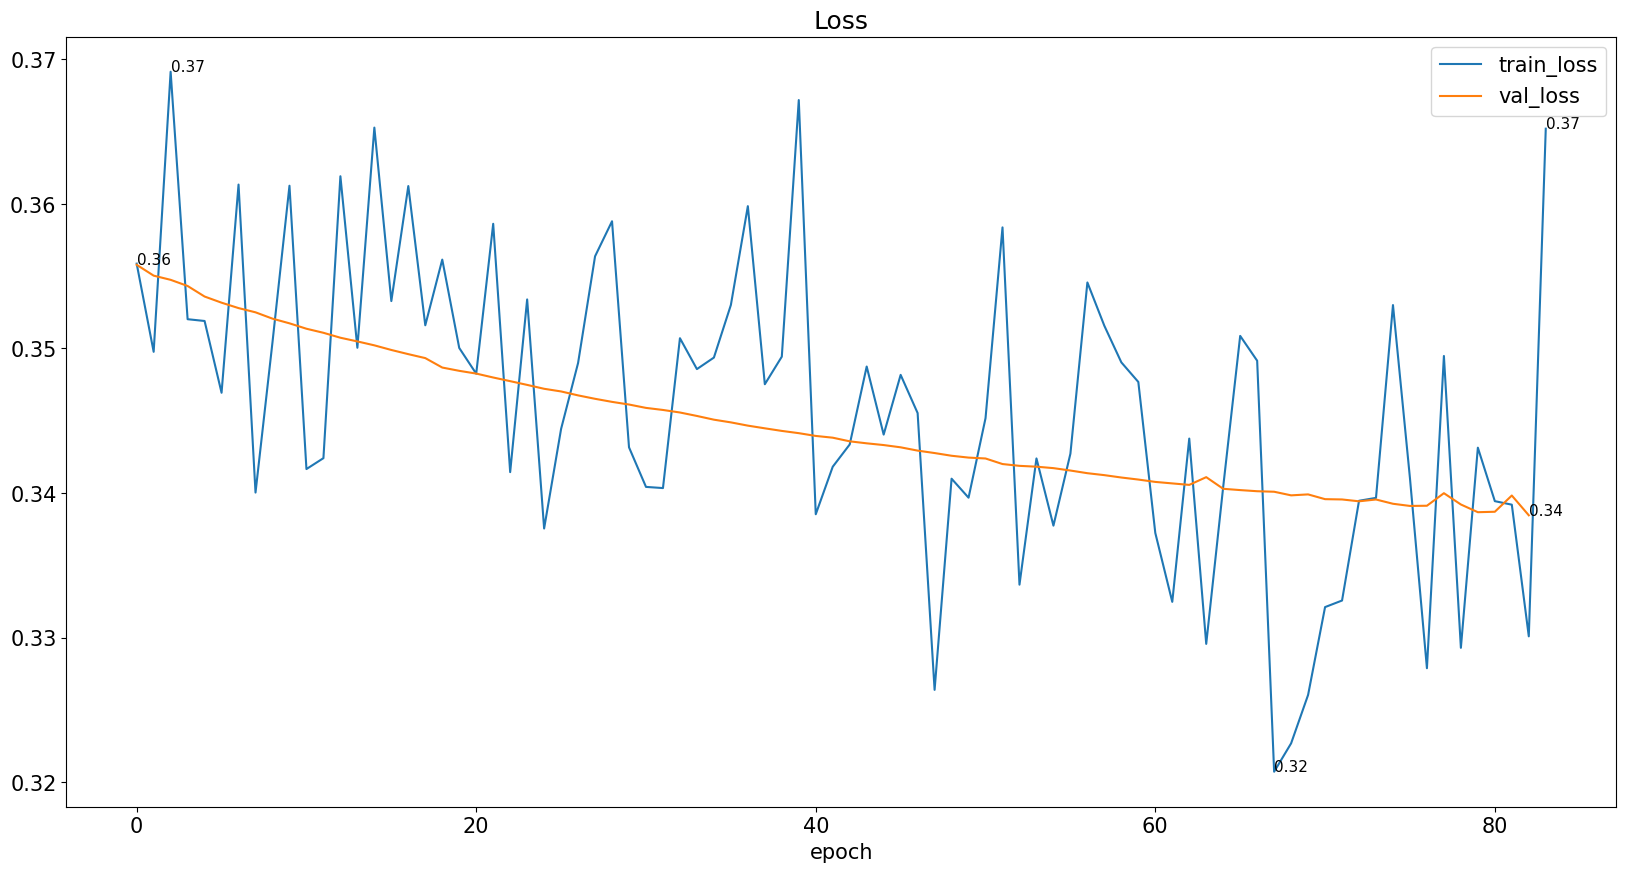

In [429]:
display(metrics, 'loss', 'Loss')

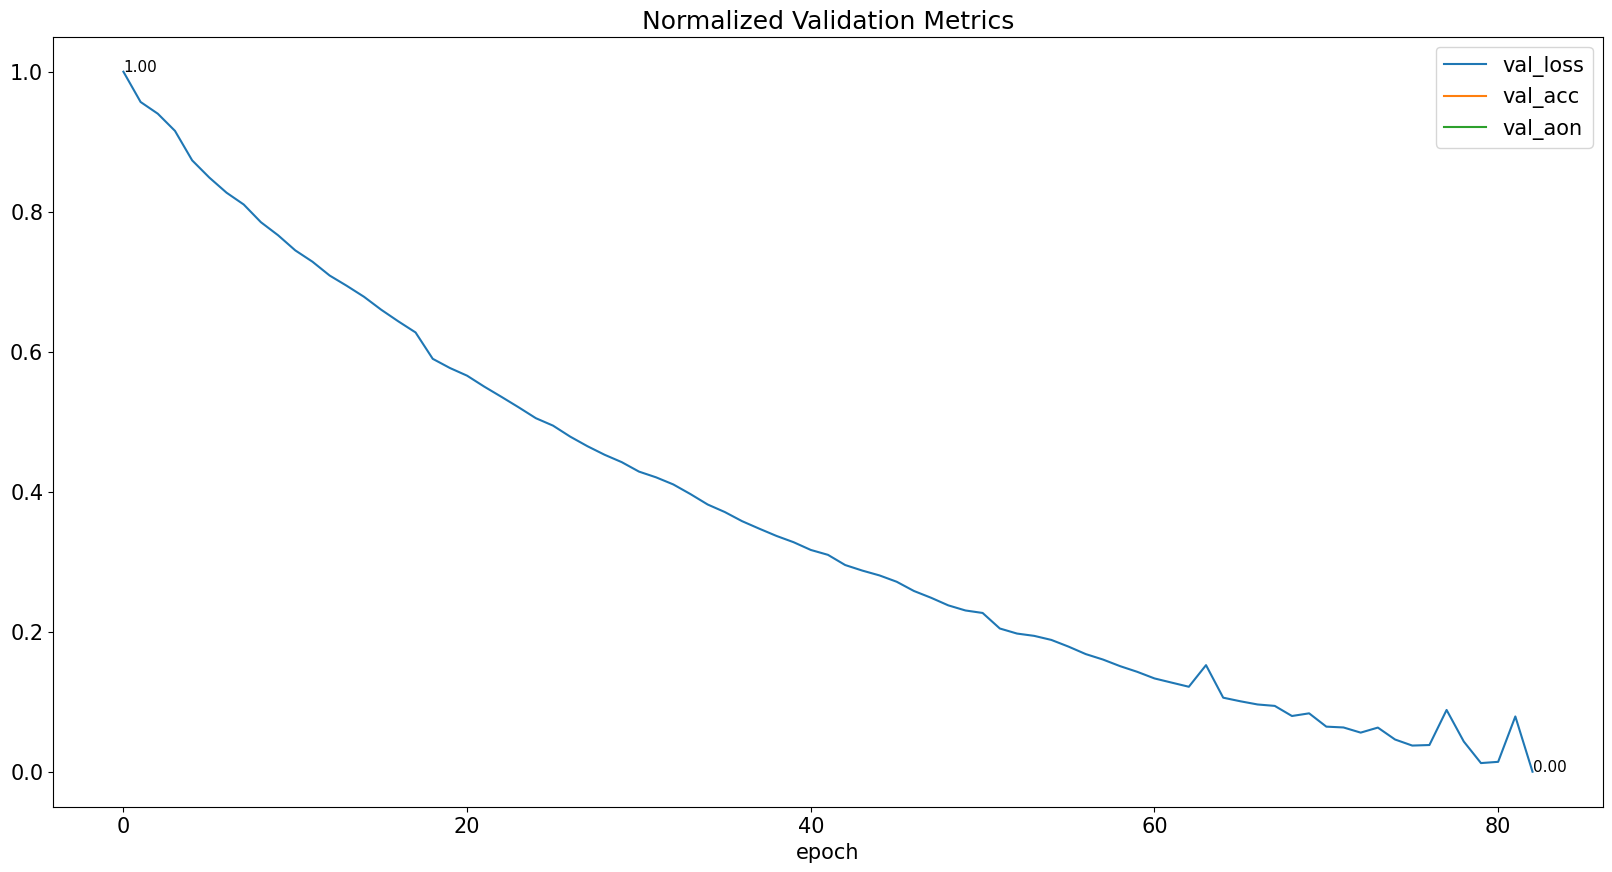

In [430]:
display(metrics, 'val', 'Normalized Validation Metrics', normalize=True)

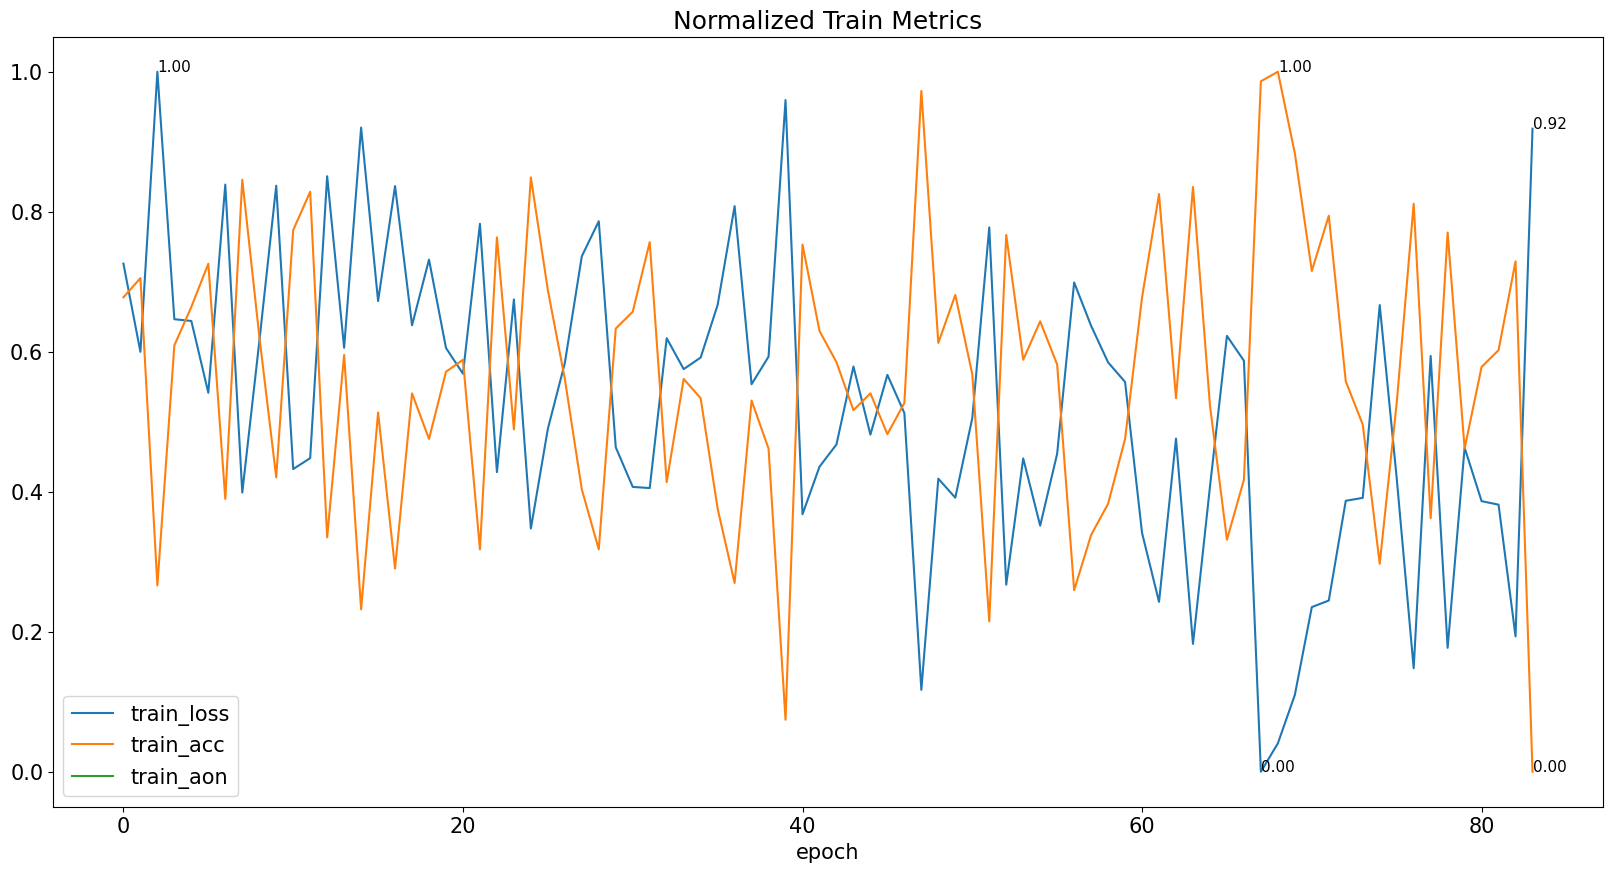

In [431]:
display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [432]:
for ax in axes:
    plt.close(ax.get_figure())